![](http://sigdelta.com/assets/images/sages-sd-logo.png)

# Analiza danych i uczenie maszynowe w Python

Autor notebooka: Jakub Nowacki.

## Obraz

Oprócz danych numerycznych i tekstowych, używa się uczenia maszynowego do klasyfikacji obrazu. Jednym z tradycyjnych zadań klasyfikacji obrazu jest [MINST](https://en.wikipedia.org/wiki/MNIST_database). Dane są dostępne do pobrania za pomocą narzędzi scikit-learn.

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np
%matplotlib inline

mnist = fetch_mldata("MNIST original")

mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
np.unique(mnist.target)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Podzielmy dane w sposób tradycyjny.

In [5]:
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Dane są w istocie obrazami w rozmiarze 28 na 28 pikseli i są to liczby od 0 do 9. 

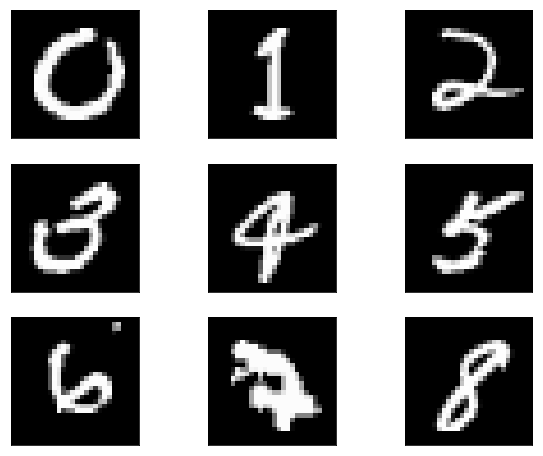

In [6]:
sample_data = np.array([mnist.data[mnist.target == c][np.random.randint(0, 1000)] for c in range(10)])
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
for data, ax in zip(sample_data, axes.ravel()):
    ax.matshow(data.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

### Wielowarstwowy perceptron

Wielowarstwowy perceptron ([multi-layer perceptron (MLP)](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron)) jest prostą siecią neuronową, która składa się z przynajmniej 3 warstw:

* wejściowej
* ukrytej (których może być wiele)
* wyjściowej

Najczęściej stosowaną funkcją aktywacyjną jest sigmoida w postaci tangensa hyperbolicznego.

![](http://scikit-learn.org/stable/_images/multilayerperceptron_network.png)

MLP stosuje się zarówno do klasyfikacji jak i do regresji, niemniej, przykładzie wykorzystamy [klasyfikator](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).

Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320


C:\Users\Matt Harasymczuk\.virtualenv\book-python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.985733
Test set score: 0.971000
             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98       980
        1.0       0.97      0.99      0.98      1135
        2.0       0.96      0.97      0.97      1032
        3.0       0.98      0.95      0.96      1010
        4.0       0.97      0.98      0.97       982
        5.0       0.96      0.97      0.96       892
        6.0       0.98      0.98      0.98       958
        7.0       0.98      0.96      0.97      1028
        8.0       0.97      0.97      0.97       974
        9.0       0.97      0.96      0.97      1009

avg / total       0.97      0.97      0.97     10000



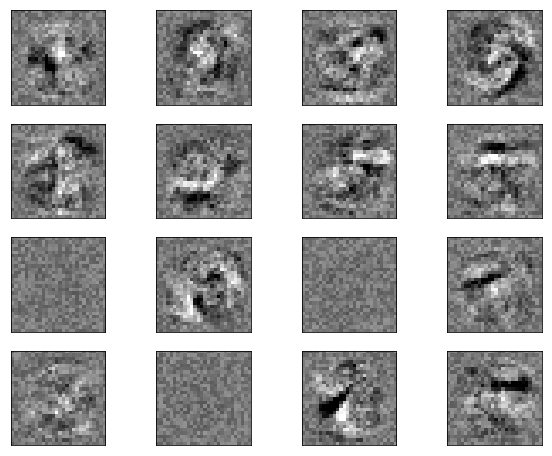

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
print(classification_report(y_test, mlp.predict(X_test)))

fig, axes = plt.subplots(4, 4, figsize=(10, 8))

vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

### Zadanie

1. Zmień ilość warstw ukrytych i ilość neuronów; zobacz jak to wpływa na model.
1. Użyj `GridSearchCV` do przeszukania parametrów modelu.
1. Zmień skalowanie danych i zobacz jak model się zachowuje.
1. Wypróbuj inną metodę rozwiązującą `solver`.